In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pymc as pm
import pymc.sampling_jax
import arviz as az
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

/Users/corrado/opt/anaconda3/envs/pymc9_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
n1 = 155
y1 = 108
n2 = 57
y2 = 28

In [4]:
with pm.Model() as model:
    # Define the priors for the two proportions
    p1 = pm.Beta("p1", alpha=2, beta=2)
    p2 = pm.Beta("p2", alpha=2, beta=2)

    # Define the likelihood functions for the two proportions
    likelihood1 = pm.Binomial("likelihood1", n=n1, p=p1, observed=y1)
    likelihood2 = pm.Binomial("likelihood2", n=n2, p=p2, observed=y2)

    # Define the difference of odds model
    odds_ratio = pm.Deterministic("odds_ratio", (p1 / (1 - p1)) / (p2 / (1 - p2)))

In [5]:
with model:
    trace = pm.sampling_jax.sample_numpyro_nuts(draws=2000, tune=1000)

Compiling...


I0000 00:00:1699425582.552752       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.
Compilation time = 0:00:05.884280


Sampling...


  0%|                                                                                                | 0/3000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                                  | 0/3000 [00:00<?, ?it/s]

  0%|                                                                                                | 0/3000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                                  | 0/3000 [00:00<?, ?it/s]

  0%|                                                                                                | 0/3000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                                  | 0/3000 [00:00<?, ?it/s]

  0%|                                                                                                | 0/3000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                                  | 0/3000 [00:00<?, ?it/s]

Running chain 3:   0%|                                                                               | 0/3000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                               | 0/3000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                               | 0/3000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                               | 0/3000 [00:01<?, ?it/s]

Running chain 0: 100%|██████████████████████████████████████████████████████████████████| 3000/3000 [00:01<00:00, 2288.44it/s]


Running chain 1: 100%|██████████████████████████████████████████████████████████████████| 3000/3000 [00:01<00:00, 2290.53it/s]


Running chain 2: 100%|██████████████████████████████████████████████████████████████████| 3000/3000 [00:01<00:00, 2292.53it/s]


Running chain 3: 100%|██████████████████████████████████████████████████████████████████| 3000/3000 [00:01<00:00, 2294.37it/s]


Sampling time = 0:00:01.538545


Transforming variables...


Transformation time = 0:00:00.075582


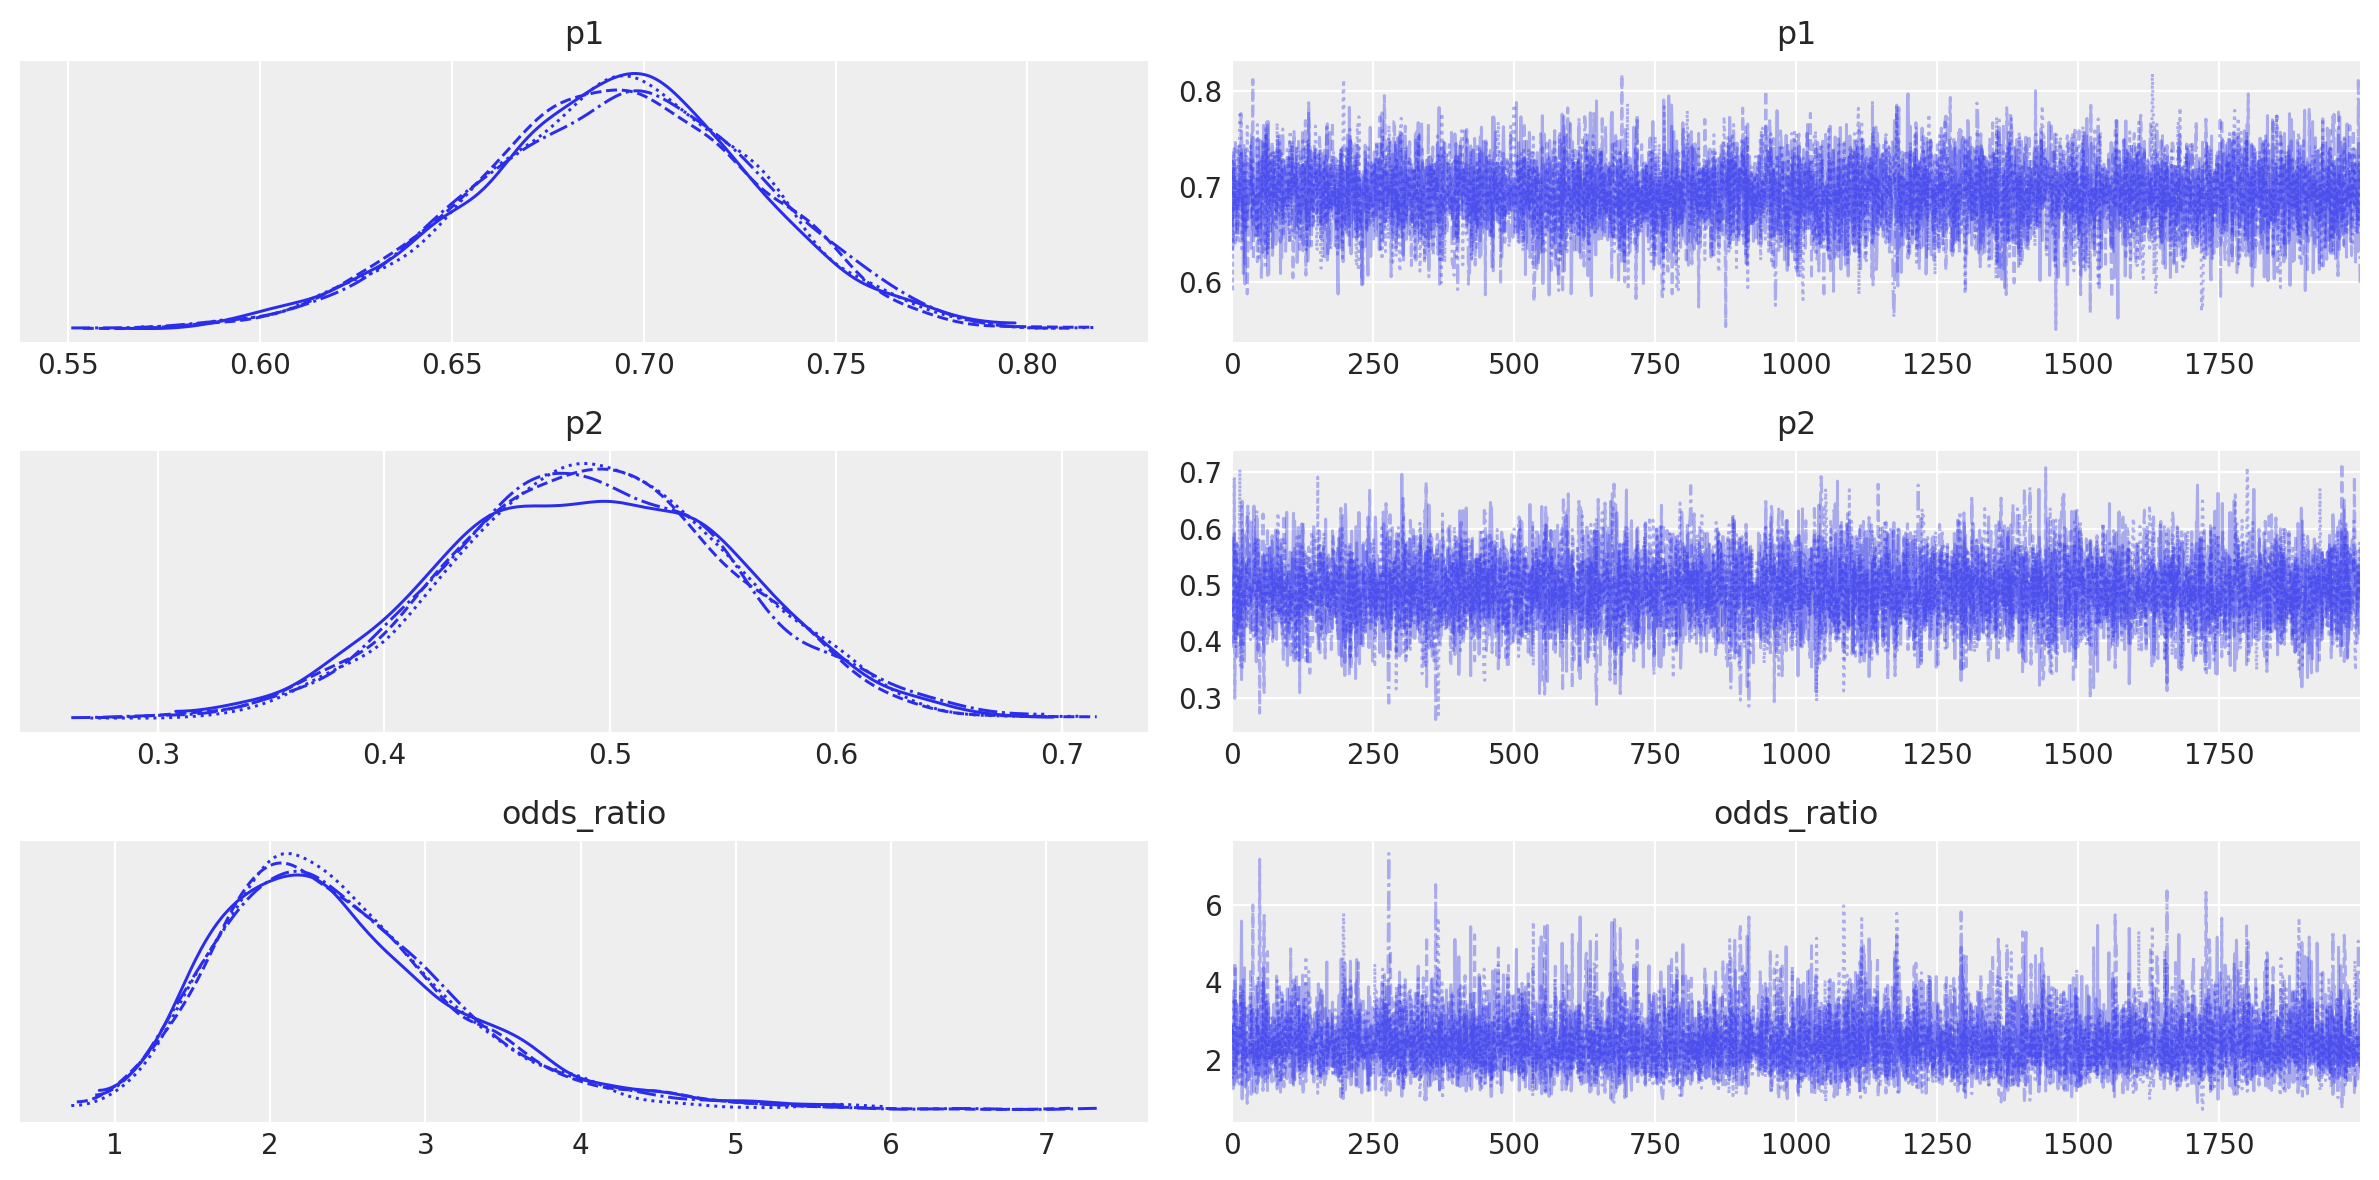

In [6]:
az.plot_trace(trace)
plt.tight_layout()

In [7]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p1,0.692,0.037,0.619,0.757,0.000,0.000,7714.0,5320.0,1.0
p2,0.492,0.063,0.369,0.604,0.001,0.001,6401.0,4456.0,1.0
odds_ratio,2.456,0.792,1.148,3.936,0.009,0.007,7036.0,4989.0,1.0


In [8]:
az.rhat(trace)

<xarray.Dataset>
Dimensions:     ()
Data variables:
    p1          float64 1.0
    p2          float64 1.001
    odds_ratio  float64 1.001

In [9]:
az.mcse(trace)

<xarray.Dataset>
Dimensions:     ()
Data variables:
    p1          float64 0.0004182
    p2          float64 0.0007907
    odds_ratio  float64 0.00945

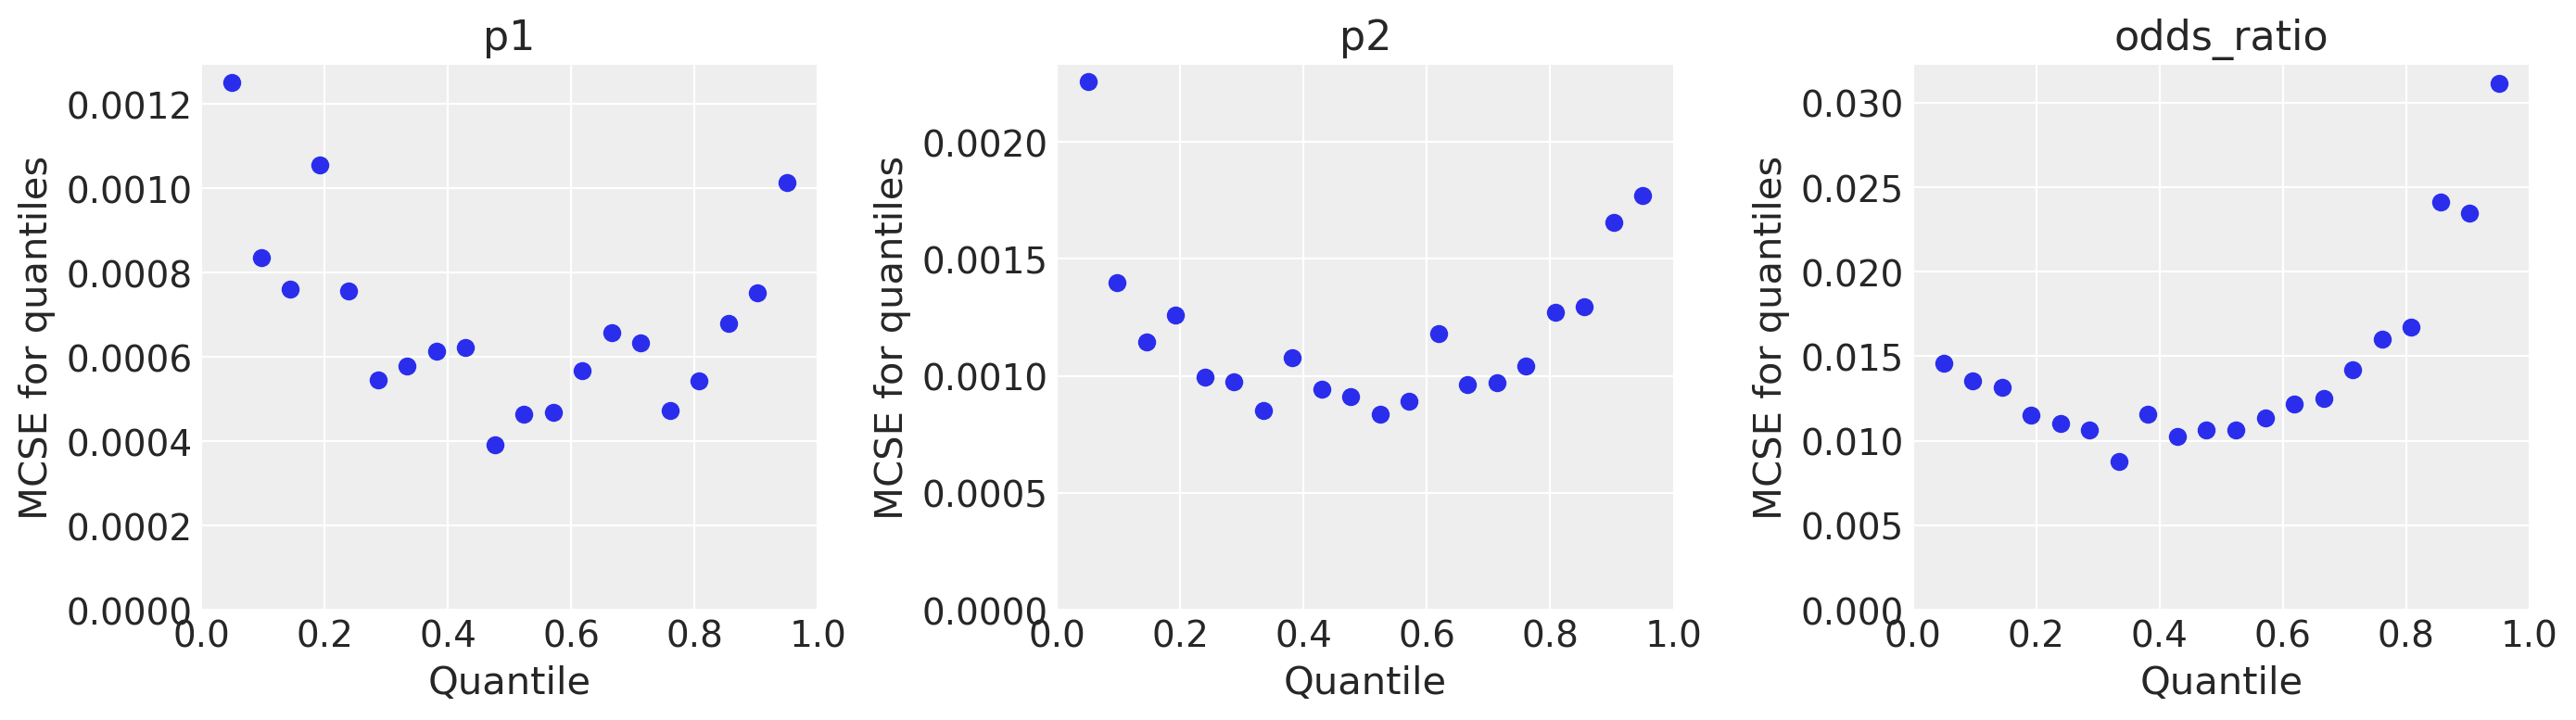

In [10]:
az.plot_mcse(trace, figsize=(14, 4))
plt.tight_layout()

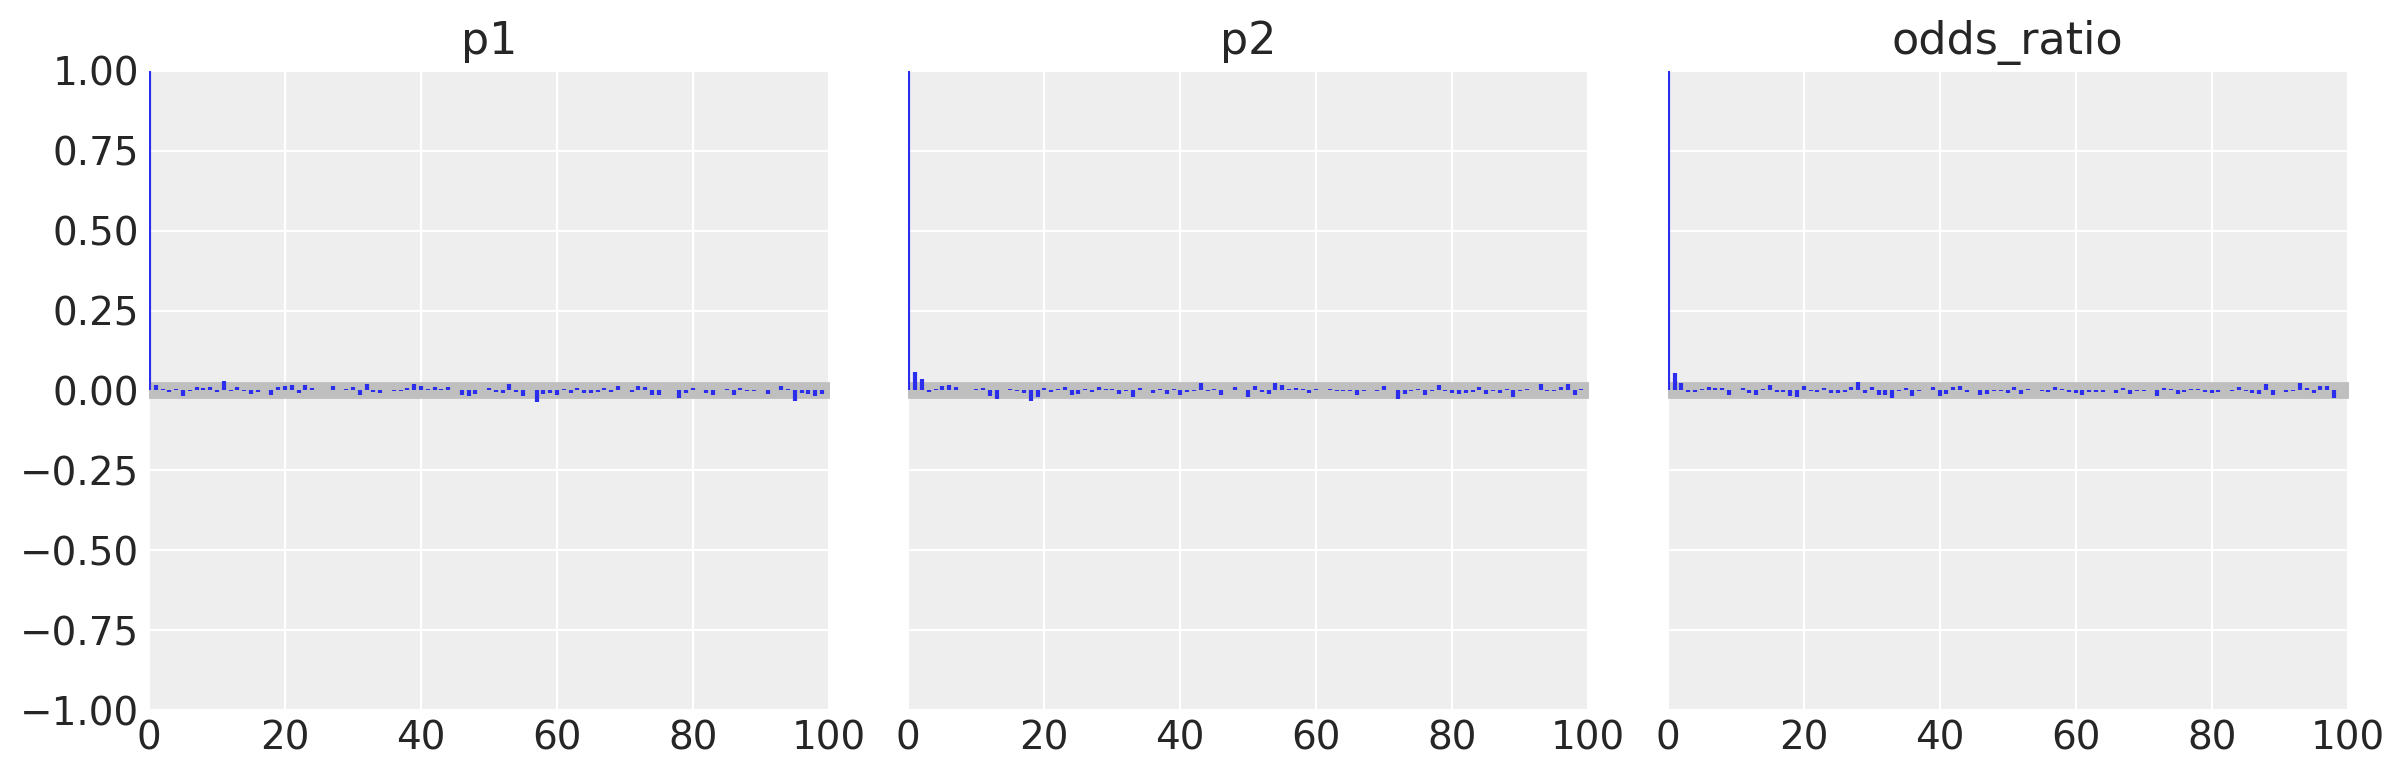

In [11]:
az.plot_autocorr(trace, combined=True, figsize=(12, 4))
plt.tight_layout()
plt.show()

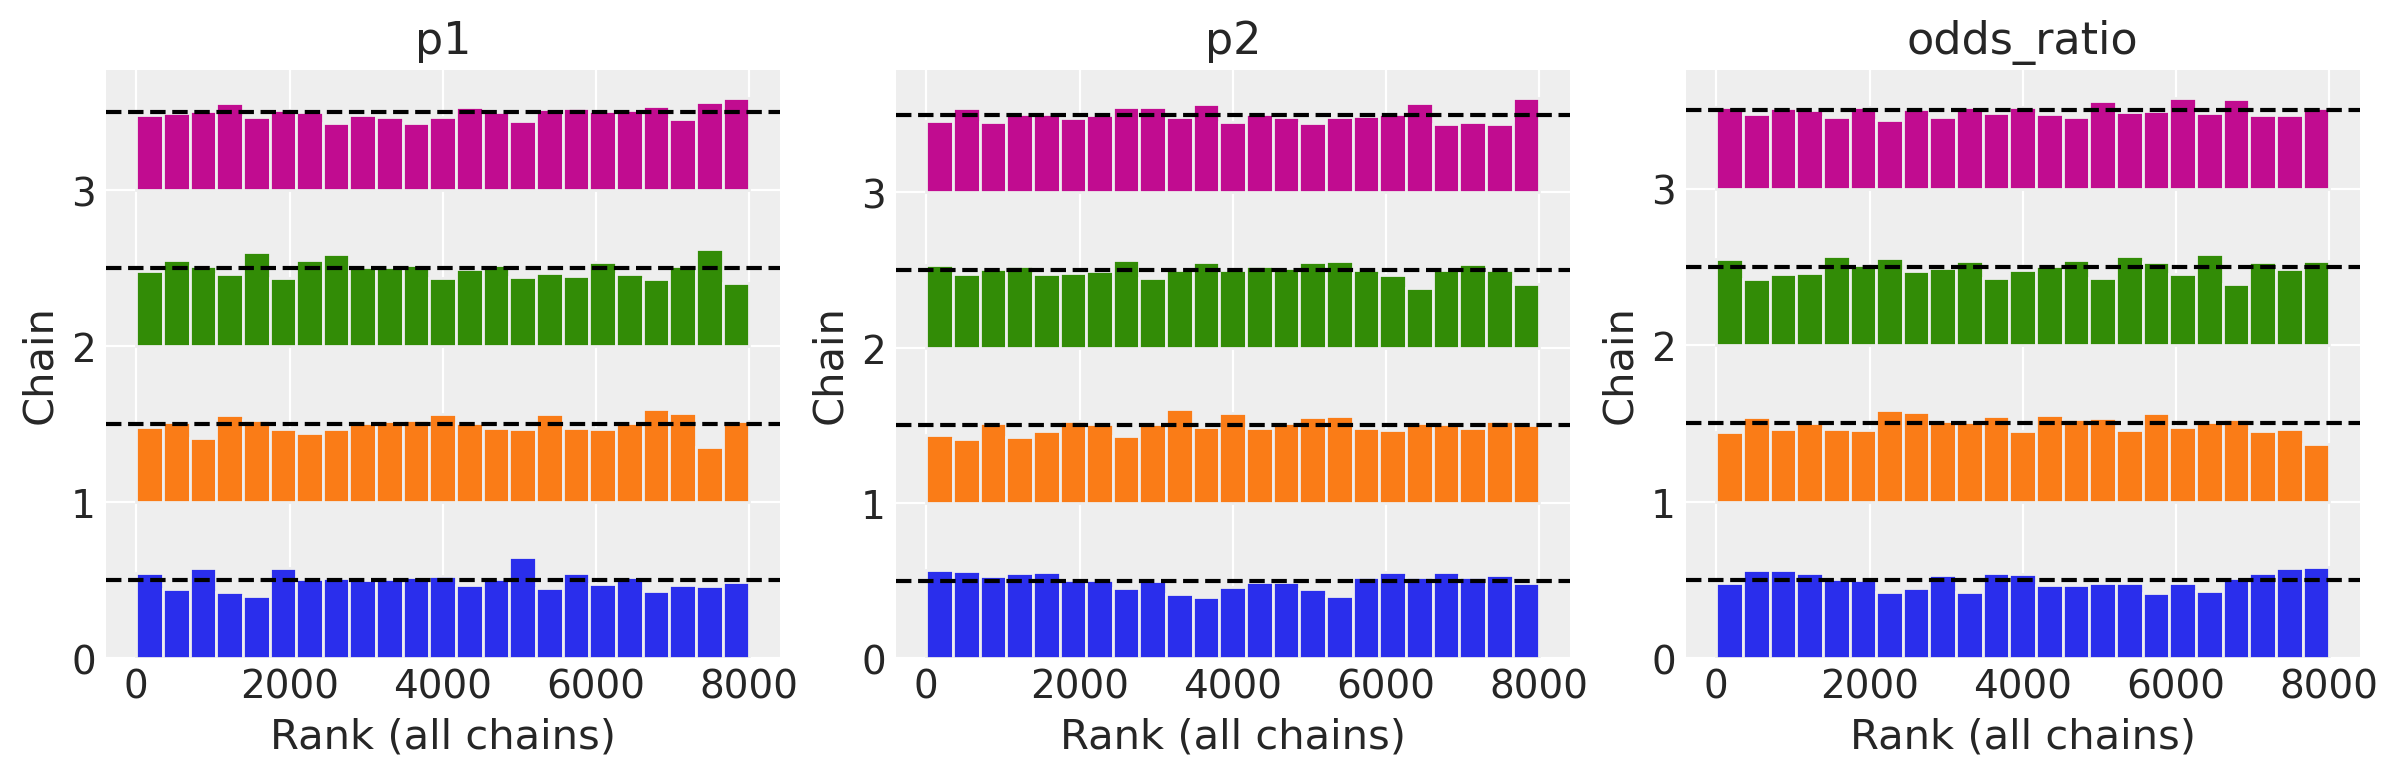

In [12]:
az.plot_rank(trace, kind="bars", figsize=(12, 4))
plt.tight_layout()

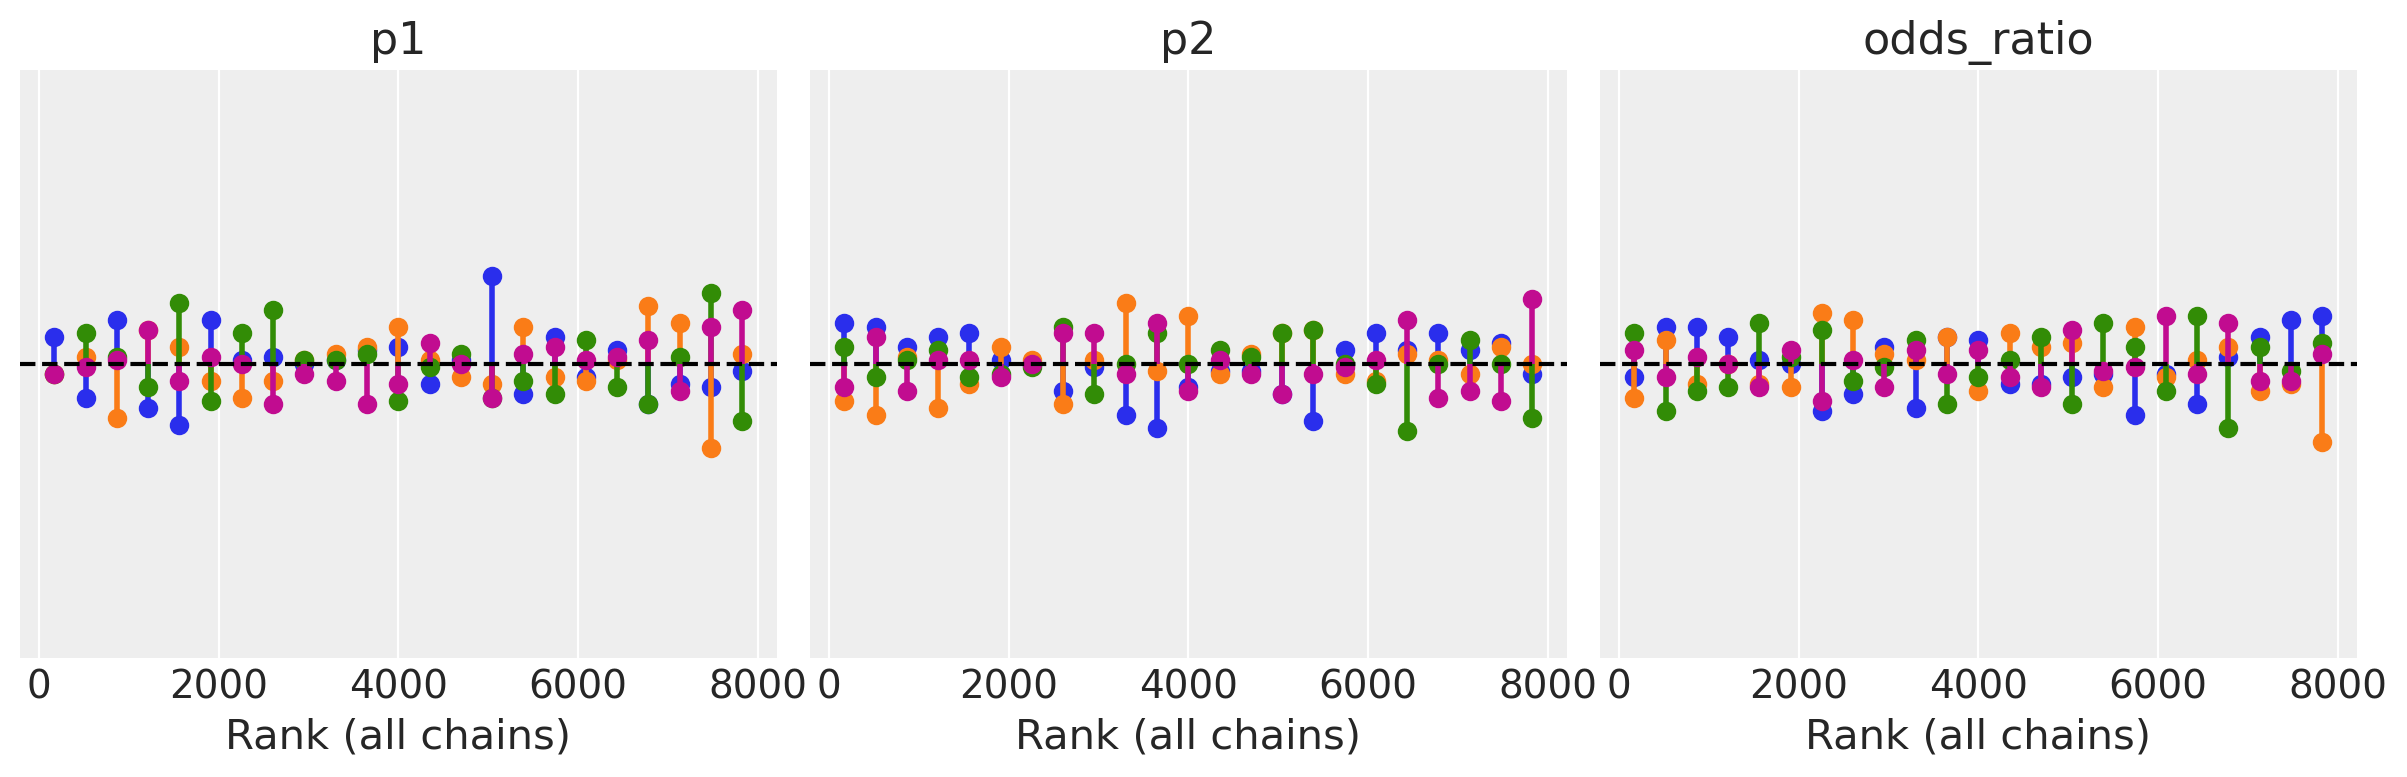

In [13]:
az.plot_rank(trace, kind="vlines", figsize=(12, 4))
plt.tight_layout()
plt.show()

In [14]:
az.bfmi(trace)

array([1.16871075, 1.05646721, 1.15489758, 1.10017702])

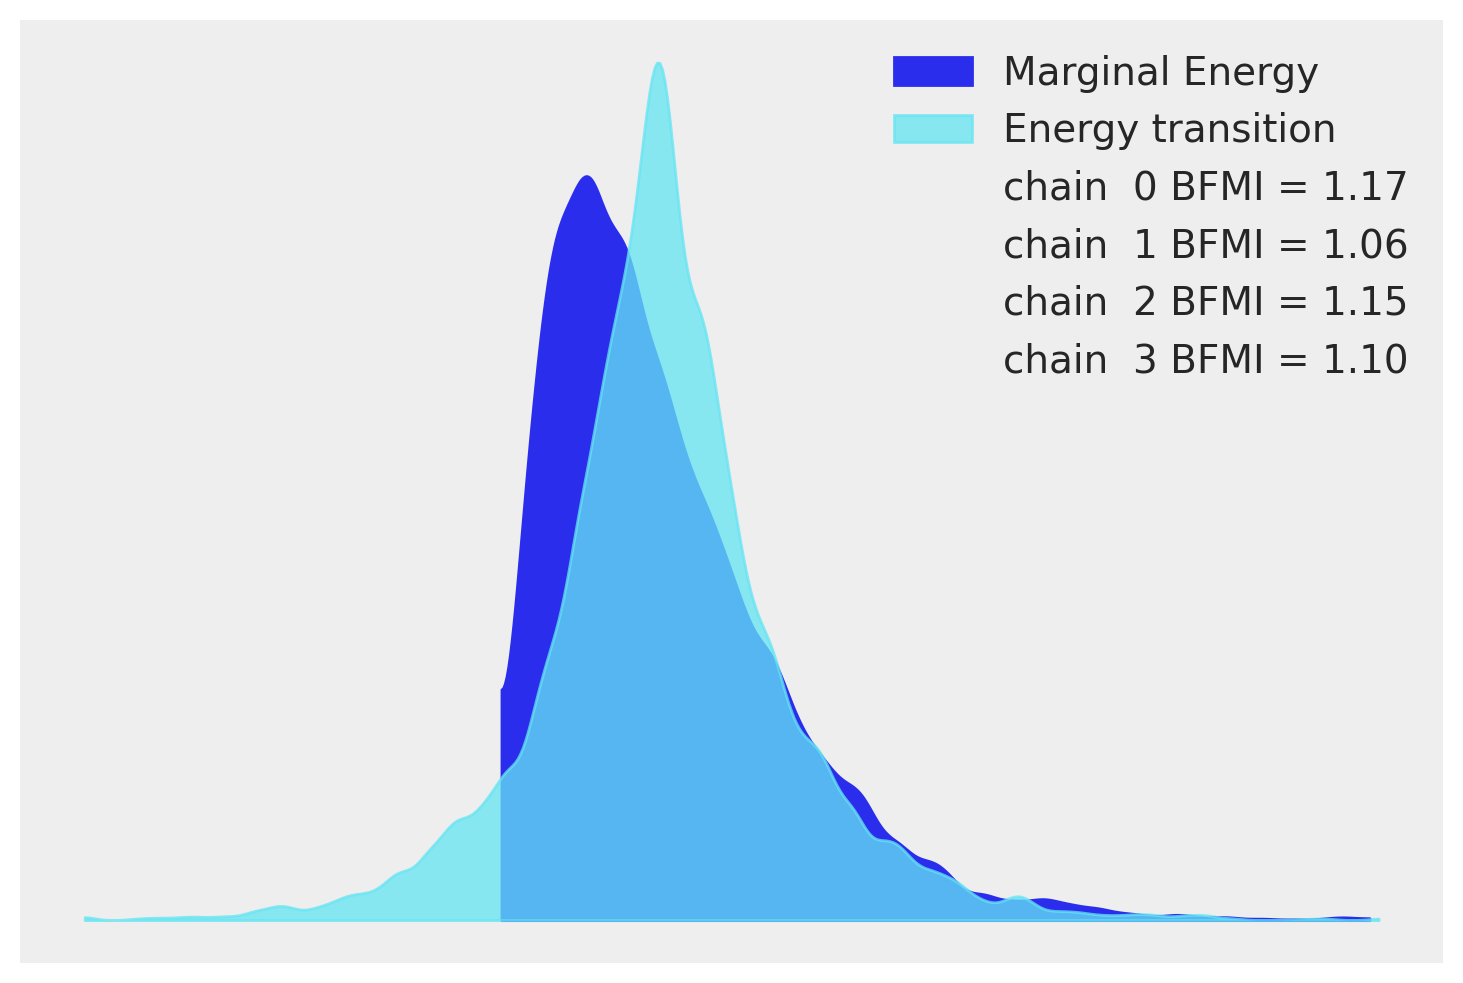

In [15]:
_ = az.plot_energy(trace)

In [16]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Wed Nov 08 2023

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

numpy     : 1.25.2
arviz     : 0.16.1
seaborn   : 0.13.0
pymc      : 5.9.1
pandas    : 2.1.1
matplotlib: 3.8.0

Watermark: 2.4.3

